## CS/ECE/ISyE 524 - Fall 2023 - HW 10 - Starter Code
## Huong Thien Do

area=0.674981435500758


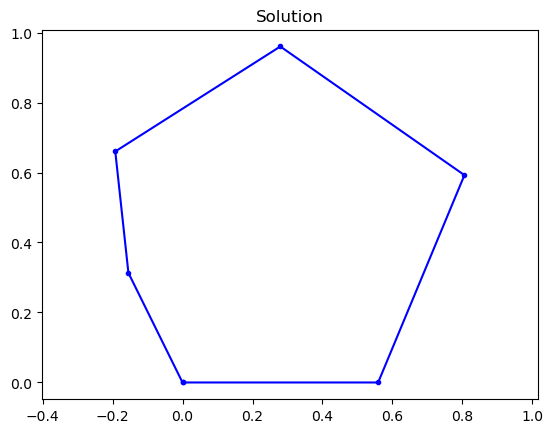

In [7]:
# Question 1 starter

using Random, JuMP, Ipopt

m = Model(Ipopt.Optimizer)

# locations of the six vertices.
@variable(m, x[1:6])
@variable(m, y[1:6])

# your code here
set_silent(m)

@constraint(m, x[1] == 0)
@constraint(m, y[1] == 0)
@constraint(m, y[2] == 0)

for i = 1:6
    for j = i+1:6
        @constraint(m, (x[i]-x[j])^2 + (y[i]-y[j])^2 <= 1)
    end
end
@NLconstraint(m, prec[i=2:5], x[i+1]*y[i] <= x[i]*y[i+1])
@NLobjective(m, Max, sum(0.5 * (x[i] * y[i+1] - x[i+1] * y[i]) for i = 2:5))
            
Random.seed!(12345)
set_start_value.(x[2:6],rand(5))
set_start_value.(y[3:6],rand(4))
optimize!(m)

# print optimal objective
println("area=",objective_value(m))
    
# plot solution from optimal values of (x,y) coordinates.
using PyPlot
X = [value.(x); 0]
Y = [value.(y); 0]
axis("equal")
plot(X,Y,"b.-")
title("Solution");


[523.3055369939487, -156.9478416048301, -0.19966457079434866]

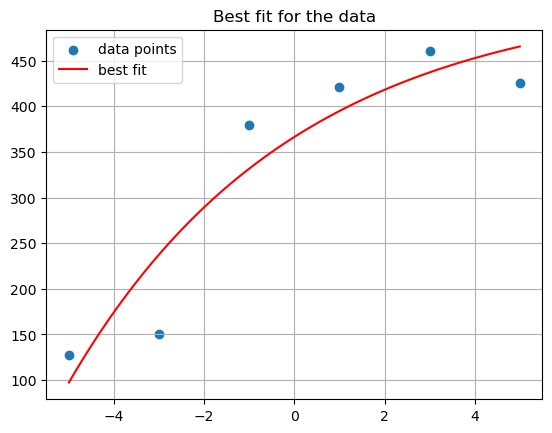

In [9]:
# Question 2 starter


using JuMP, Ipopt, PyPlot

x =     [ -5  -3  -1   1   3   5]
ymeas = [127 151 379 421 460 426]
N = length(x)


# your code here
# your code here
m = Model(Ipopt.Optimizer)
set_silent(m)

@variable(m, k[1:3])
@NLexpression(m, y_fit[i=1:N], k[1] + k[2] * exp(x[i]* k[3]))

@NLobjective(m, Min, sum((y_fit[i] - ymeas[i])^2 for i=1:N))

set_start_value.(k, [500, -200, -1])

optimize!(m)

K = JuMP.value.(k)
print(K)

xv = range(-5, stop=5, length=100)
# plot some silly curve (replace this with the real thing)
yv = K[1] .+ K[2] .*exp.(K[3]*xv)

scatter(x, ymeas, label="data points")
plot(xv, yv, "r-", label="best fit")
grid()
legend(loc="best"); title("Best fit for the data")

;